# GAIA Clustering & Analysis
#### -------------------------------------------------------------------------
## Data importation from **.vot

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys, os
sys.path.append('C:\\Users\Quentin\\Documents\\ALMA_CHILI\\gaia-shock\\src')

## directory
rootdir = r'C:\Users\Quentin\Documents\ALMA_CHILI'
wdir    = r'%s\products'%(rootdir)
#notedir = r'%s\gaia-shock\notebooks_Quentin'%(rootdir)

os.chdir(wdir)  # to change the current directory

import gaia_utils_quentin as gu

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [2]:
name_list = ["M67", "NGC2516", "NGC752", "NGC1039", "NGC1342", "NGC1647"]
clustername = "NGC2516"
RADIUS       = 3.
errtol       = 0.10
source = gu.source(clustername, RADIUS, errtol)
source.read_votable()
source.convert_filter_data()
source.convert_to_cartesian()

## NGC2516-3.0deg-0.1err.vot read...
## Total stars: 79407

## Conversion done...
## Stars selected: 66786


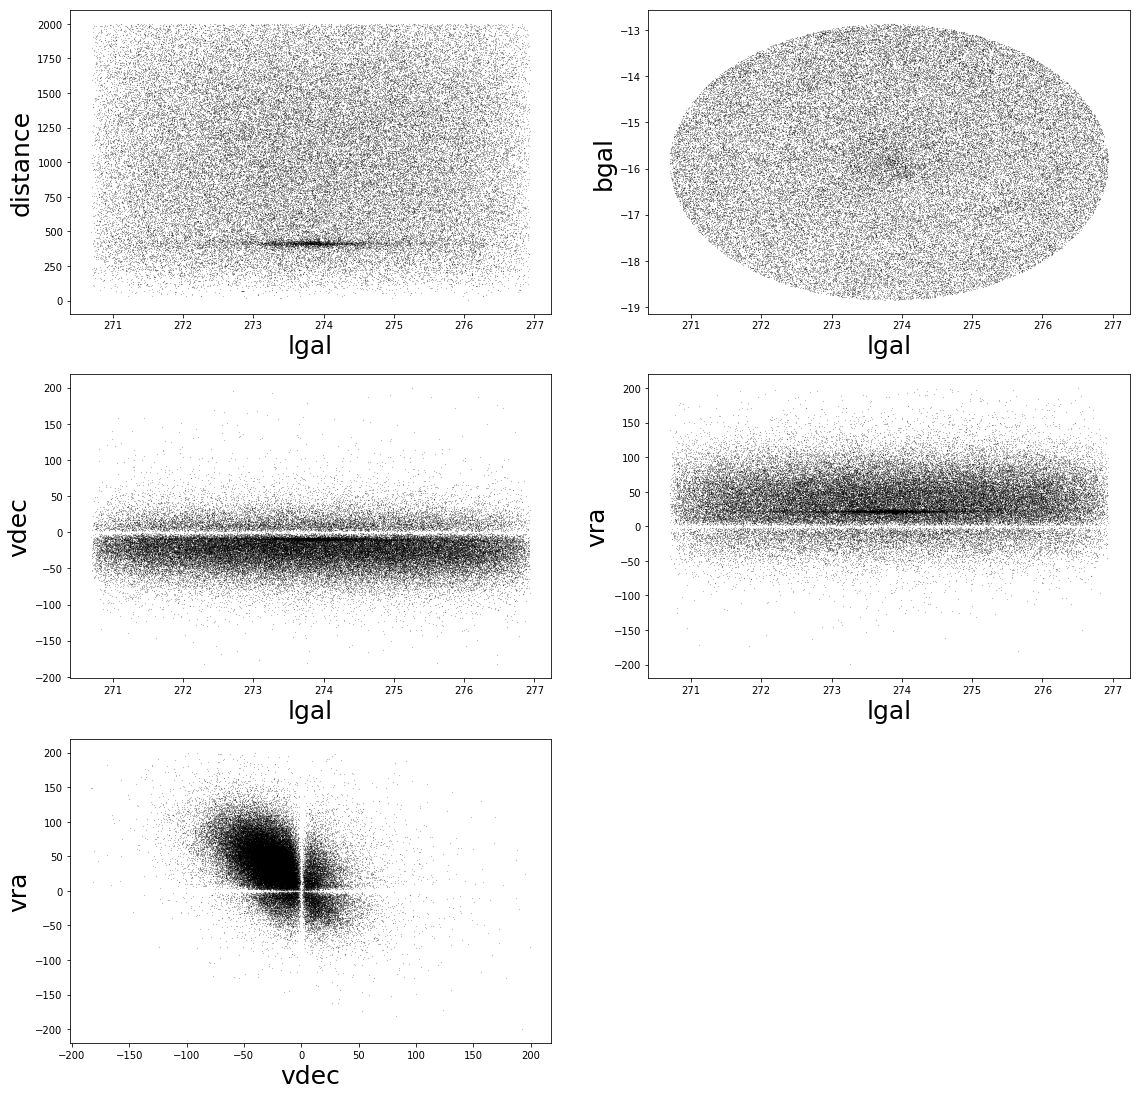

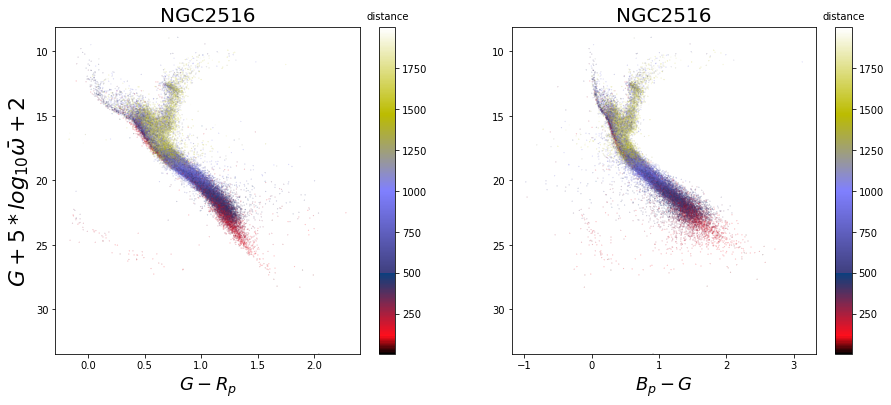

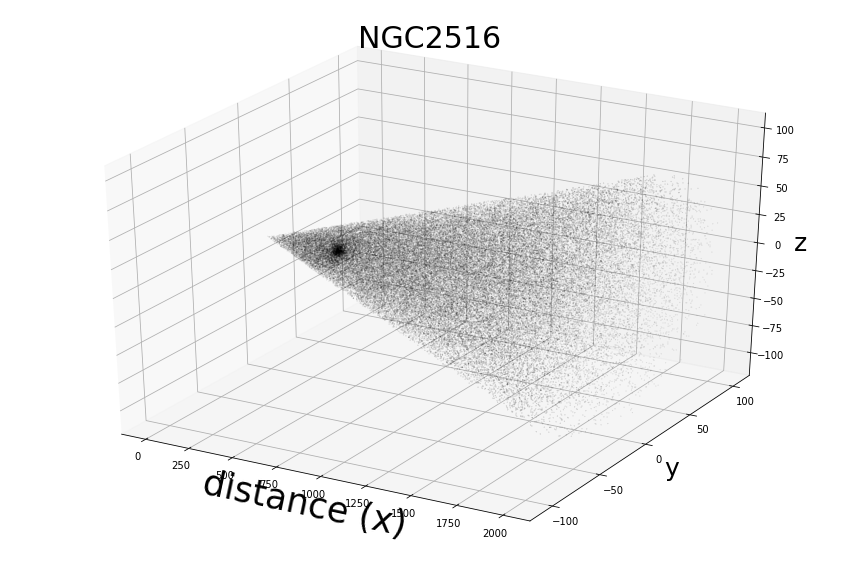

In [3]:
source.plot_information(0.01)
source.plot_3D(0.01,True)

#### -------------------------------------------------------------
### Normalisation

## Normalization done on filtered data..
## Normalization done on filtered data..


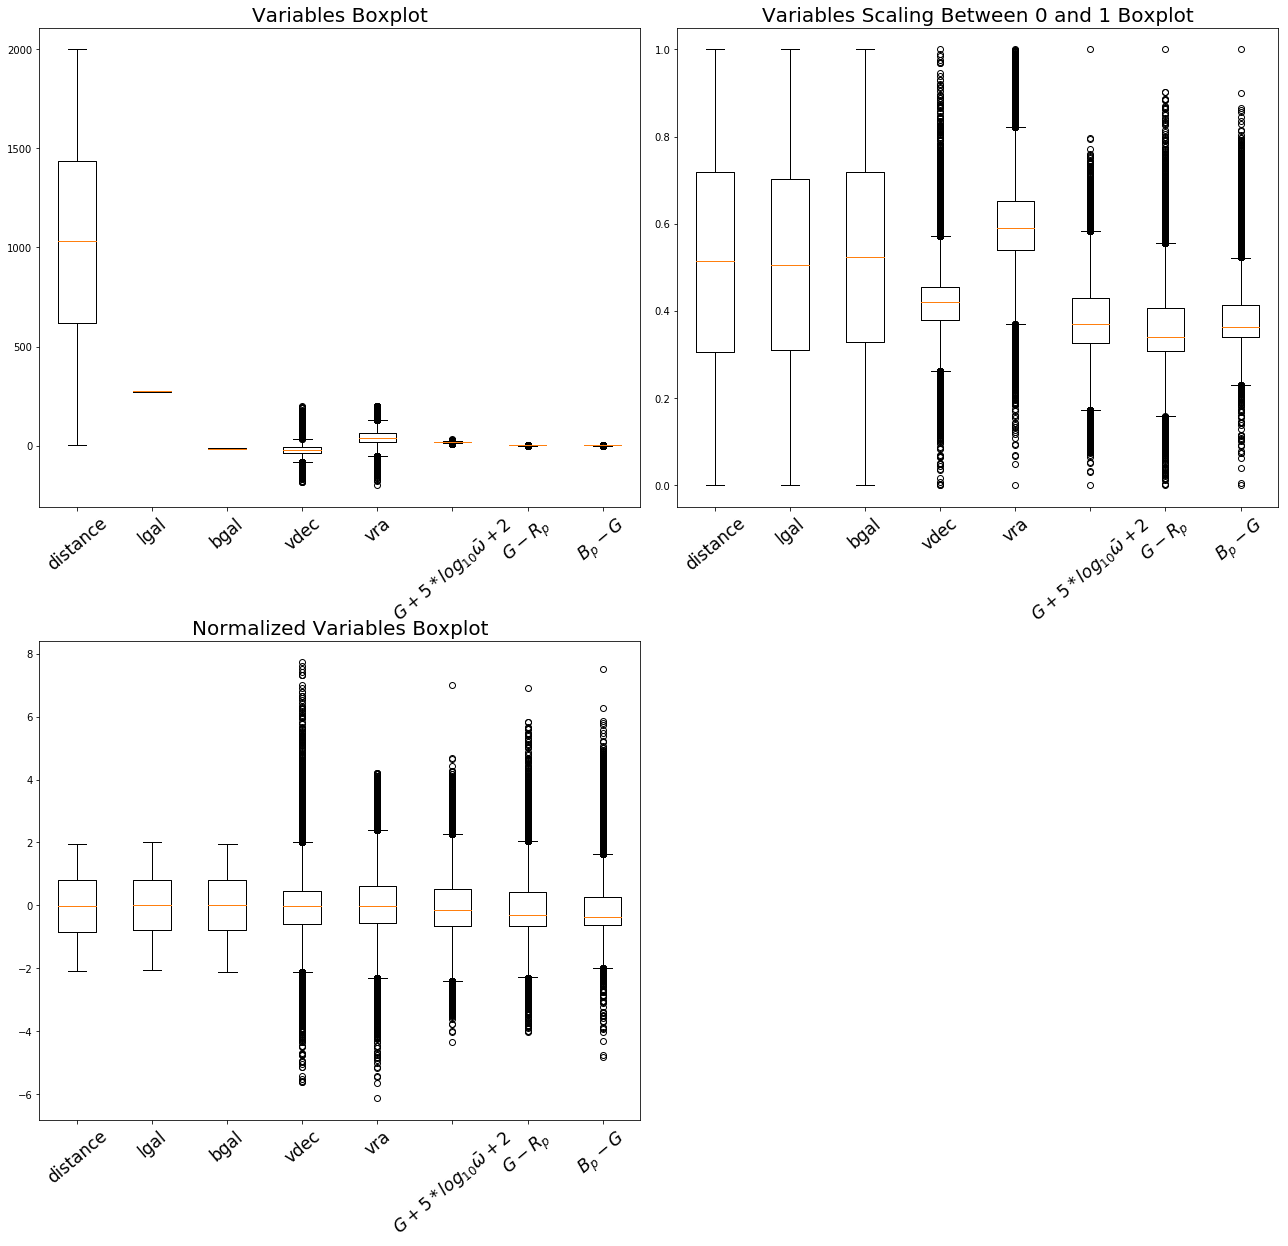

In [4]:
source.normalization_minmax()
plt.figure(figsize=(18,16))
plt.subplot(221)
plt.title("Variables Boxplot", fontsize=20)
plt.boxplot(source.df[:,:]);
plt.xticks(np.arange(len(source.data_name))+1, source.data_name, rotation = 40, fontsize = 17)
plt.subplot(222)
plt.title("Variables Scaling Between 0 and 1 Boxplot", fontsize=20)
plt.boxplot(source.dfnorm[:,:]);
plt.xticks(np.arange(len(source.data_name))+1, source.data_name, rotation = 40, fontsize = 17)
plt.subplot(223)
plt.tight_layout()
source.normalization_normal()
plt.title("Normalized Variables Boxplot", fontsize=20)
plt.boxplot(source.dfnorm[:,:]);
plt.xticks(np.arange(len(source.data_name))+1, source.data_name, rotation = 40, fontsize = 17)
plt.show()

# -------------------------------------------------------------
## DBSCAN Clustering Method

In [5]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [ ]:
# #############################################################################
# Compute DBSCAN
X = source.dfnorm
n_clusters_=0
eps = 0.6
min_samples = 20
while n_clusters_ != 1 :
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print("nb clusters : "+str(n_clusters_)+"   min_samples="+str(min_samples))
    min_samples+=5
ilabel = np.where(labels == 0)[0]
print("if 1 cluster, size : "+str(len(ilabel)))
print(min_samples)

In [29]:
eps = 0.6
min_samples = 20
weight = [3,1,1,2,2,2,2,2]

db = DBSCAN(eps=eps, min_samples=min_samples).fit(source.dfnorm*weight)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("nb clusters : "+str(n_clusters_)+"   min_samples="+str(min_samples))

nb clusters : 1   min_samples=20


In [30]:
ilabel = np.where(labels == 0)[0]
print("if 1 cluster, size : "+str(len(ilabel)))
print(min_samples)

if 1 cluster, size : 1725
20


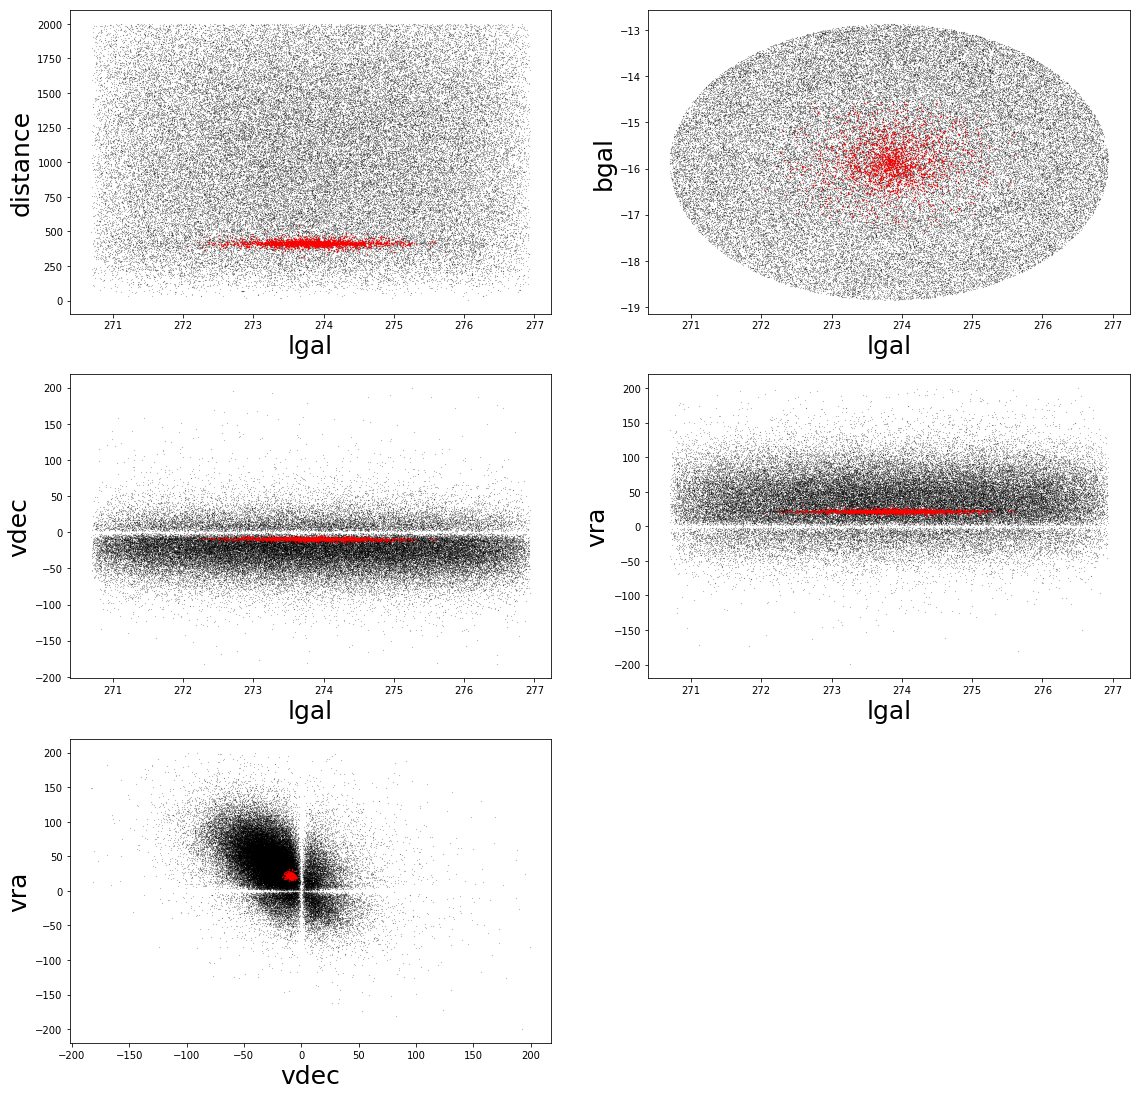

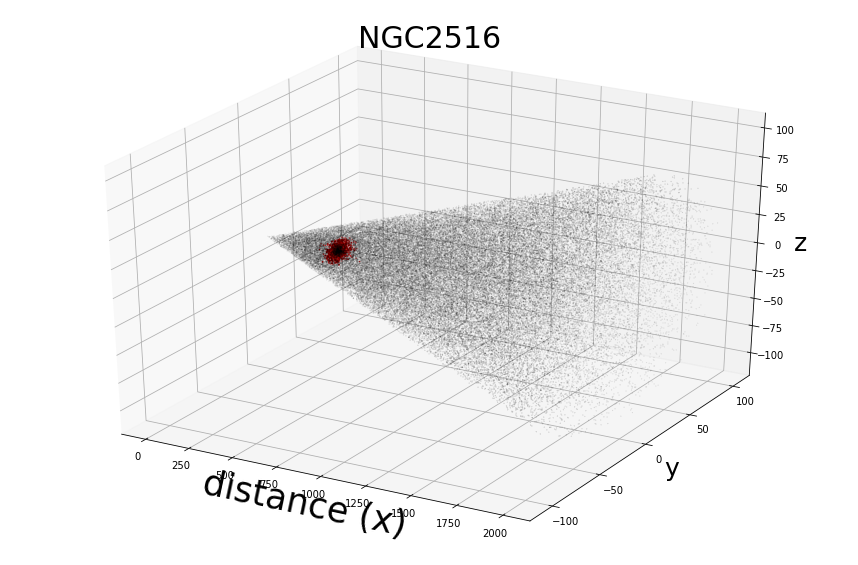

In [31]:
source.plot_information(0.01, HRD=False, ilabel=ilabel)
source.plot_3D(0.01,True,ilabel=ilabel)